In [1]:
import random
import networkx as nx
from pyvis.network import Network
import matplotlib.pyplot as plt
import math


In [8]:
# current notable shortfalls: reinfection is just as likely as primary infection, the infections start from a single patient zero

tot = 500 # number of people
friends = 5 # number of contacts generated for each person; note that we end up with more than tot*friends connections because of lolcode
steps = 20
p_infection = 0.05 # assumption about the probability of getting infected from a single infected contact in 1 time step
duration = 10 # assumption about how long after getting infected you remain infectious
adoption_p = 0.1 # what fraction of the population has the app


Start
{0: [191, 130, 208, 161, 290, 122, 224], 1: [190, 262, 173, 4, 37, 307, 486], 2: [164, 274, 88, 245, 272, 41, 226, 298, 324, 330, 439, 499], 3: [94, 210, 7, 423, 50, 57, 154, 405], 4: [1, 308, 222, 113, 180, 8, 21, 249, 263, 305], 5: [468, 427, 9, 425, 52, 68, 186, 450], 6: [137, 64, 155, 70, 347, 123, 236], 7: [3, 469, 17, 76, 237, 43, 244, 471], 8: [483, 395, 4, 118, 274, 185, 212, 241, 302, 401, 455], 9: [5, 219, 93, 271, 83, 228], 10: [36, 150, 290, 191, 393, 30, 206], 11: [278, 426, 217, 248, 478, 86, 246, 302], 12: [286, 481, 115, 356, 237, 290, 312, 416, 454], 13: [256, 339, 33, 213, 193, 178, 245], 14: [24, 305, 112, 497, 352, 405, 479], 15: [437, 123, 359, 145, 314, 125, 138, 296], 16: [226, 135, 356, 201, 245, 97, 285], 17: [7, 447, 360, 347, 135, 55, 60, 247, 429], 18: [101, 136, 384, 468, 95, 60, 161, 175, 182, 246], 19: [70, 360, 59, 146, 439, 22, 127], 20: [207, 146, 363, 255, 267, 261, 291, 292], 21: [170, 307, 229, 4, 236, 39, 137, 155, 252, 336], 22: [115, 19, 35

[0] -----
[191, 130, 208, 161, 290, 122, 224] -----
208
[0, 10, 47, 418, 263, 285, 0, 295, 72, 76, 42, 149, 359, 363, 437, 480, 0, 195, 251, 244, 355, 287, 0, 275, 420, 18, 319, 224, 0, 10, 27, 183, 209, 263, 12, 218, 403, 299, 457, 451, 99, 103, 0, 67, 119, 356, 161, 96, 281, 0, 276, 352] -----
263
76
363
437
195
251
244
420
319
99
103
356
281
[36, 150, 290, 191, 393, 30, 206, 326, 191, 460, 84, 348, 192, 74, 191, 384, 211, 148, 117, 191, 416, 4, 290, 397, 191, 104, 230, 16, 293, 334, 350, 498, 44, 130, 143, 238, 59, 216, 137, 160, 217, 368, 78, 90, 130, 132, 7, 43, 75, 113, 189, 130, 238, 38, 256, 225, 203, 216, 130, 333, 318, 458, 342, 130, 156, 300, 15, 165, 180, 207, 349, 355, 130, 469, 211, 442, 199, 20, 99, 254, 130, 394, 15, 221, 387, 404, 130, 462, 85, 235, 444, 130, 55, 182, 251, 344, 328, 113, 208, 242, 52, 165, 195, 208, 258, 59, 208, 221, 7, 261, 208, 422, 175, 359, 75, 490, 208, 233, 107, 403, 387, 426, 63, 161, 472, 297, 419, 477, 62, 63, 161, 193, 310, 101, 136, 384, 46

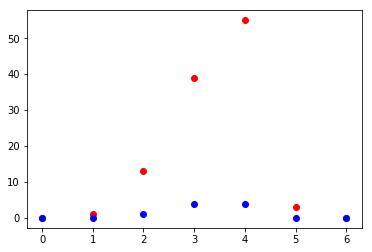

{0: [0, 1], 1: [0, 0], 2: [19, 0], 3: [0, 0], 4: [0, 0], 5: [0, 0], 6: [0, 0], 7: [14, 0], 8: [0, 0], 9: [19, 0], 10: [0, 1], 11: [0, 0], 12: [0, 0], 13: [18, 0], 14: [18, 0], 15: [0, 0], 16: [15, 0], 17: [0, 0], 18: [0, 0], 19: [0, 0], 20: [0, 1], 21: [0, 0], 22: [0, 0], 23: [17, 0], 24: [0, 0], 25: [0, 0], 26: [0, 0], 27: [0, 0], 28: [0, 0], 29: [0, 0], 30: [19, 1], 31: [0, 0], 32: [19, 0], 33: [0, 0], 34: [0, 0], 35: [0, 0], 36: [0, 0], 37: [0, 0], 38: [19, 0], 39: [0, 0], 40: [0, 1], 41: [19, 0], 42: [0, 0], 43: [0, 0], 44: [0, 0], 45: [13, 0], 46: [0, 0], 47: [0, 0], 48: [0, 0], 49: [0, 0], 50: [0, 1], 51: [14, 0], 52: [0, 0], 53: [18, 0], 54: [0, 0], 55: [0, 0], 56: [0, 0], 57: [16, 0], 58: [0, 0], 59: [0, 0], 60: [0, 1], 61: [19, 0], 62: [19, 0], 63: [0, 0], 64: [0, 0], 65: [0, 0], 66: [17, 0], 67: [0, 0], 68: [0, 0], 69: [0, 0], 70: [0, 1], 71: [0, 0], 72: [0, 0], 73: [0, 0], 74: [0, 0], 75: [0, 0], 76: [18, 0], 77: [0, 0], 78: [0, 0], 79: [0, 0], 80: [15, 1], 81: [18, 0], 82: 

In [11]:
net1 = Network()
contacts = {}
infected = {} # tracks whether you are infected, and if so, when did you get infected
k = 0
t1 = 0
c = 0

print("Start")

# setup
for i in range(tot):
    contacts[i] = []
    if (c % math.floor(1 / adoption_p) == 0):
        infected[i] = [0, 1] # time of infection, app adoption
    else:
        infected[i] = [0, 0] # time of infection, app adoption
    c += 1

# this generates {friends} connections for each person, meaning that there will be ~1.5x as many connections as there would be with more careful code
for i in range(tot):
    for j in range(friends):
        if (len(contacts[i]) == friends):
            break
        r = random.randrange(tot)
        while (r == i):
            r = random.randrange(tot);
        # print(r, j, i, "--------------")
        # print(r, i, contacts[r], contacts[i])
        if (r not in contacts[i]):
            contacts[i].append(r)
            k += 1
        if (i not in contacts[r]):
            contacts[r].append(i)
            k += 1
        # print(r, i, contacts[r], contacts[i])
        
def infect_step(t):
    for person in contacts:
        for friend in contacts[person]:
            if (infected[friend][0] > 0):
                r = random.randrange(0, 100)
                if (r < p_infection*100):
                    infected[person][0] = t
                    net1.add_node(person, label=str(person), color = "red")
        if (t > infected[person][0] + duration):
            infected[person][0] = 0
    return(t+1)

def check_add_node(target, graph):
    if (infected[target][0] > 0):
        graph.add_node(target, str(target), color = "red")
    else:
        graph.add_node(target, str(target), color = "blue")
    return(graph)

def waterfall_edges(target, graph, already_graphed):
    for friend in contacts[target]:
        if (friend not in already_graphed):
            already_graphed.append(friend)
            check_add_node(friend, graph)
            graph.add_edge(target, friend)
            waterfall_edges(friend, graph, already_graphed)
            
def generate_graph(graph):
    for person in infected:
            check_add_node(person, graph)
    for person in contacts:
        for friend in contacts[person]:
            graph.add_edge(person, friend)
            
    net1.show_buttons(filter_=['physics'])
    graph.show("graph.html")
    return(graph)
            

def generate_histogram(targets, contacts, app):
    histo = []
    seen = set()
    def walk(layer, depth):
        print(layer, "-----")
        if (len(layer) == 0):
            return
        next_layer = []
        n_infected = 0
        for target in layer:
            if (target not in seen):
                seen.add(target)
                next_layer += contacts[target]
                if (app == 0):
                    if (infected[target][0] > 0):
                        n_infected += 1
                        print(target)
                else:
                    if (infected[target][1] > 0):
                        if (infected[target][0] > 0):
                            n_infected += 1
                            print(target)
        histo.append(n_infected)
        walk(next_layer, depth + 1)
        
    walk(targets, 0)
    return histo
    

infected[2][0] = 1
for i in range(steps):
    t1 = infect_step(t1)
print(contacts)


generate_graph(net1)

y_axis = generate_histogram([0], contacts, 0)
x_axis = []
y_axis2 = generate_histogram([0], contacts, 1)
x_axis2 = []
for el in range(len(y_axis)):
    x_axis.append(el)
for el in range(len(y_axis2)):
    x_axis2.append(el)
plt.plot(x_axis, y_axis, 'or', x_axis2, y_axis2, 'ob')
plt.show()


print(infected)
print("End ", k)

4
[8]
[8, 5, 7]
